**Introduction for the California Housing Price Prediction Project**

In this project, we build and compare multiple machine learning models to predict housing prices in California. Using Python and libraries like Pandas, NumPy, Scikit-learn, and TensorFlow/Keras, to analyze California housing dataset.This dataset includes features such as geographical coordinates, housing attributes, and proximity to the ocean.The target variable is the median housing price in various districts.

The primary objective is to explore regression techniques to predict continuous values effectively. The project demonstrates the end-to-end machine learning workflow, including data preprocessing, feature scaling, model selection, and evaluation.

The goal of this project is to predict median house prices in California using various machine learning models. We experiment with traditional regression models and neural networks, comparing their performance to determine the best approach

**IMPORTING NECESSARY LIBRARIES AND DEPENDENCIES**


These libraries are essential for data handling (Pandas), numerical computations (NumPy), and data visualization (Matplotlib, Seaborn).Also  We import machine learning models (LinearRegression, RandomForest, etc.), preprocessing tools (StandardScaler), and evaluation metrics (mean_squared_error) from Scikit-learn.While TensorFlow/Keras is used to design, train, and save neural networks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor


Loading the Dataset

In [ ]:
housing_pd = pd.read_csv('/content/housing.csv')

In [ ]:
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#To understand the distribution of the categorical variable ocean_proximity.
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**Shuffling and Encoding categorical variables**

Shuffling ensures randomness in the dataset. Encoding converts ocean_proximity into numerical "dummy variables," which machine learning models can process.

In [ ]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [ ]:
# Preprocess ocean_proximity
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_final = pd.concat(
    [housing_pd_shuffled.drop('ocean_proximity', axis=1),
     pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],
    axis=1
)

In [ ]:
# Rearrange columns
housing_pd_final = housing_pd_final[[
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]

In [ ]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


**Handeling Missing Values**

In [ ]:
housing_pd_final = housing_pd_final.dropna()

In [ ]:
len(housing_pd_final)

20433

**Splitting the data **

Here Data is divided into:

1)Training set: Used to train the model.


2)Validation set: Used to fine-tune hyperparameters.


3)Test set: Used to evaluate the final model's performance.

In [ ]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

**Feature Scaling
& Custom Processor**

Scaling ensures all numerical features have a similar range, preventing dominance of features with larger values.

while Preprocessor applies scaling consistently to training, validation, and test sets, ensuring uniform transformation.

In [ ]:
scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.27684,0.328234,-0.326667,True,False,False,False,False
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,False,True,False,False,False
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,False,False,False,True,False
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.07974,-1.082862,-1.235508,False,False,False,True,False
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,True,False,False,False,False


<Axes: >

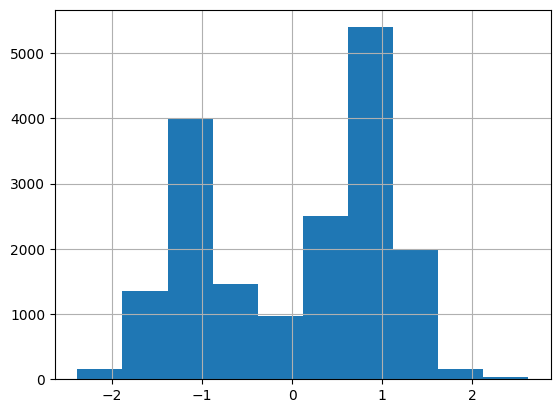

In [ ]:
pd.DataFrame(X_train)[0].hist()

**A)using Linear Regression**


A simple model that predicts house prices by fitting a straight line through the data which May underperform with complex data or non-linear relationships.

In [ ]:
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(68593.05578127236, 71382.43558330165)

**B)K-Nearest Neighbors(KNN)**

Predicts prices based on the average values of the nearest 10 data points.
Limitation: Can overfit if the number of neighbors is too small.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(53759.09908812057, 62161.22860469906)

**C)Random Forest**


Uses multiple decision trees to make predictions and Handles non-linear data well and reduces overfitting via ensemble learning.

In [ ]:
rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(43569.9006950773, 53183.737414903306)

**D)Gradient Boosting**

Combines weak learners incrementally to improve accuracy. Typically outperforms Random Forest in predictive tasks.

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(47274.82259072158, 51210.606733472116)

In [ ]:
# Convert data to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')




IMPORTING NECESSARY LIBRARIES AND DEPENDENCIES.


1)for Building Simple Neural Network**

 A basic neural network with one hidden layer and two neurons.

In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)  #save as .keras format
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 54539640832.0000 - root_mean_squared_error: 233498.9531 - val_loss: 41773555712.0000 - val_root_mean_squared_error: 204385.7969
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34940604416.0000 - root_mean_squared_error: 186656.0312 - val_loss: 18346248192.0000 - val_root_mean_squared_error: 135448.3281
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14725444608.0000 - root_mean_squared_error: 121149.6953 - val_loss: 9118205952.0000 - val_root_mean_squared_error: 95489.2969
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8249291776.0000 - root_mean_squared_error: 90765.3516 - val_loss: 7016109568.0000 - val_root_mean_squared_error: 83762.2188
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6735520256.0000 - root_mean_squared_error: 82020.9297 - val_loss: 6083796480.0000 - val_root_mean_squared_error: 77998.6953
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5585

In [ ]:
simple_nn = load_model('models/simple_nn.keras')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(65134.406, 67586.695)

**2)for Medium Neural Network**

Adds more complexity with two hidden layers (32 and 16 neurons)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 19243558912.0000 - root_mean_squared_error: 132632.7500 - val_loss: 5051724288.0000 - val_root_mean_squared_error: 71075.4844
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4470901760.0000 - root_mean_squared_error: 66862.2266 - val_loss: 4687271424.0000 - val_root_mean_squared_error: 68463.6484
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4235913472.0000 - root_mean_squared_error: 65050.3984 - val_loss: 4779671552.0000 - val_root_mean_squared_error: 69135.1719
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4214558720.0000 - root_mean_squared_error: 64906.3906 - val_loss: 4535901696.0000 - val_root_mean_squared_error: 67349.1016
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4208945664.0000 - root_mean_squared_error: 64865.4570 - val_loss: 4441363968.0000 - val_root_mean_squared_error: 66643.5625
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4287689472.0

In [ ]:
medium_nn = load_model('models/medium_nn.keras')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(52156.613, 55225.0)

**3) for Large Neural Network**


A highly complex network with multiple layers, useful for capturing intricate patterns.

In [ ]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

#Training Neural Network
#Neural networks require iterative optimization, where the optimizer (e.g., Adam) adjusts weights to minimize error.
opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14577685504.0000 - root_mean_squared_error: 115639.1953 - val_loss: 6201869312.0000 - val_root_mean_squared_error: 78751.9453
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4583801344.0000 - root_mean_squared_error: 67686.6641 - val_loss: 4813209600.0000 - val_root_mean_squared_error: 69377.2969
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4220409344.0000 - root_mean_squared_error: 64951.8555 - val_loss: 5594952704.0000 - val_root_mean_squared_error: 74799.4141
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4146496256.0000 - root_mean_squared_error: 64378.2812 - val_loss: 4005124608.0000 - val_root_mean_squared_error: 63286.0547
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3633795328.0000 - root_mean_squared_error: 60272.2188 - val_loss: 4249569536.0000 - val_root_mean_squared_error: 65188.7227
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3642889728.0

In [ ]:
large_nn = load_model('models/large_nn.keras')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(47861.855, 53809.13)

In [ ]:
mse(gbr.predict(X_test), y_test, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


49345.935411338134

**Evaluation**


Models are evaluated using the Root Mean Squared Error (RMSE):

1)Linear Regression: Poor performance due to limited complexity.


2)KNN: Improved accuracy but risks overfitting with fewer neighbors.


3)Random Forest: Strong performance with manageable complexity.

4)Gradient Boosting: Best among traditional models, achieving low RMSE.


5)Neural Networks: Increasing complexity improves accuracy, but the risk of overfitting rises with deeper architectures.

 **CONCLUSION**


The **most suitable Model** here is **Gradient Boosting **achieved the best overall performance on the test set with the **lowest RMSE (~49,000).**


while
**Simpler models (like Linear Regression)** are **less effective** for complex datasets.

Ensemble methods like **Random Forest and Gradient Boosting** excel in **capturing non-linear relationships.**
and

Neural networks require careful tuning to balance complexity and overfitting.
This project highlights the importance of trying multiple models, preprocessing data effectively, and evaluating results to make informed decisions.